In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('raw_data (1).csv')

In [ ]:
df.dtypes

,0
id_user,object
gender,object
date_reg,object
platform,object
id_traffic_source,object
country_group,int64
age_group,int64
system,object
date_payment,object
method,object


In [ ]:
df.columns

Index(['id_user', 'gender', 'date_reg', 'platform', 'id_traffic_source',
       'country_group', 'age_group', 'system', 'date_payment', 'method',
       'amount', 'successful_payment', 'split_group'],
      dtype='object')

In [ ]:
df.describe()

,country_group,age_group,amount,successful_payment,split_group
count,58938.000000,58938.000000,10122.000000,10238.000000,58938.000000
mean,1.328617,2.989684,138.087253,0.665071,0.164291
std,0.741689,1.203772,83.758981,0.471989,0.370543
min,1.000000,1.000000,20.145000,0.000000,0.000000
25%,1.000000,2.000000,43.470000,0.000000,0.000000
50%,1.000000,3.000000,104.170000,1.000000,0.000000
75%,1.000000,4.000000,194.930000,1.000000,0.000000
max,4.000000,5.000000,335.340000,1.000000,1.000000


In [ ]:
df['date_payment'] > '2021-07-24'

,date_payment
0,False
1,False
2,False
3,False
4,False
...,...
58933,False
58934,False
58935,True
58936,False


In [ ]:
filtered_df = df[(df['date_reg'] >= '2021-07-24')]

In [ ]:
filtered_df['date_payment']

,date_payment
11,NaN
12,NaN
13,NaN
18,NaN
22,2021-08-04 18:58:44
...,...
58914,2021-08-07 00:20:53
58920,NaN
58921,NaN
58927,NaN


In [ ]:
filtered_df['split_group'].value_counts()

,count
split_group,
0,9779
1,9618


In [ ]:
users_a = filtered_df[(filtered_df['split_group'] == 0)]['id_user'].nunique()
users_a

8652

In [ ]:
users_b = filtered_df[(filtered_df['split_group'] == 1)]['id_user'].nunique()
users_b

8513

In [ ]:
targeted_actions_a = filtered_df[(filtered_df['split_group'] == 0) & (filtered_df['successful_payment'] == 1)]['id_user'].nunique()
targeted_actions_a

263

In [ ]:
targeted_actions_b = filtered_df[(filtered_df['split_group'] == 1) & (filtered_df['successful_payment'] == 1)]['id_user'].nunique()
targeted_actions_b

260

In [ ]:
conversion_a = (targeted_actions_a / users_a) * 100
round(conversion_a, 2)

3.04

In [ ]:
conversion_b = (targeted_actions_b / users_b) * 100
round(conversion_b, 2)

3.05

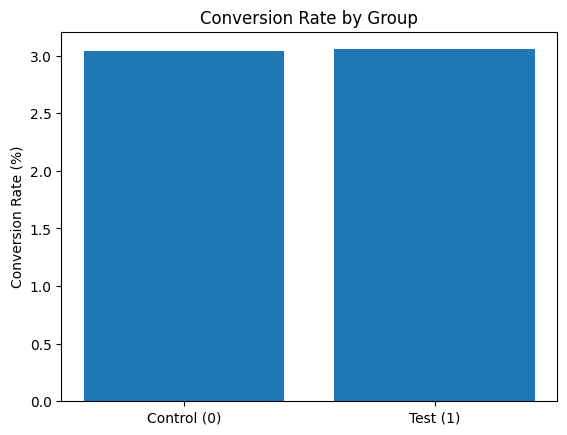

In [ ]:
plt.figure()
plt.bar(['Control (0)', 'Test (1)'], [conversion_a, conversion_b])
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Group')
plt.show()